# **Model Implementation**

# Importing Libraries

In [41]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Importing Dataset

In [43]:
dataset=pd.read_csv("/content/heart_data.csv")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [44]:
dataset.shape

(303, 14)

In [45]:
x.shape

(303, 13)

In [46]:
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [47]:
y.shape

(303,)

# Splitting Training Data and Testing Data

In [48]:
X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [49]:
X_train.shape

(242, 13)

In [50]:
Y_train.shape

(242,)

# Modelling

In [51]:
Models=[]
Accuracy=[]
KF=[]
def save_accuracy(model, accuracy, kf_min, kf_max):
    Models.append(model)
    Accuracy.append(accuracy)
    kf_min=round(kf_min,2)
    kf_max=round(kf_max,2)
    KF.append(str(kf_min)+" - "+str(kf_max))

In [52]:
Models.clear()
Accuracy.clear()
KF.clear()

# SVM

In [53]:
svm_model=svm.SVC(kernel="linear")
svm_model.fit(X_train, Y_train)
svm_pred=svm_model.predict(X_test)
accuracy_svm=round(accuracy_score(svm_pred, Y_test)*100,2)
print("Accuracy of SVM is: "+str(accuracy_svm))

Accuracy of SVM is: 86.89


In [54]:
svm_kf = cross_val_score(estimator = svm_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("Kernel SVM", accuracy_svm, svm_kf.min()*100, svm_kf.max()*100)

# Logistic Regression

In [55]:
LR_classifier= LogisticRegression(fit_intercept= False, n_jobs= 1)      #Model Trainging
LR_classifier.fit(X_train, Y_train)
lr_pred=LR_classifier.predict(X_test)
accuracy_lr=round(accuracy_score(Y_test,lr_pred)*100,2)
print("Accuracy of LR is: "+str(accuracy_lr))

Accuracy of LR is: 88.52


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [56]:
lr_kf = cross_val_score(estimator = LR_classifier, X = X_train, y = Y_train, cv = 10)
print(lr_kf)
save_accuracy("Logistic Regression", accuracy_lr, lr_kf.min()*100, lr_kf.max()*100)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.88       0.8        0.875      0.875      0.91666667 0.875
 0.79166667 0.70833333 0.70833333 0.83333333]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Naive Bayes

In [57]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
nb_pred=nb_model.predict(X_test)
accuracy_nb=round(accuracy_score(Y_test,nb_pred)*100,2)
print("Accuracy of Naive Bayes is: "+str(accuracy_nb))

Accuracy of Naive Bayes is: 80.33


In [58]:
nb_kf = cross_val_score(estimator = nb_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("Naive Bayes", accuracy_nb, nb_kf.min()*100, nb_kf.max()*100)
print(nb_kf)

[0.84       0.68       0.875      0.91666667 0.875      0.83333333
 0.75       0.75       0.66666667 0.91666667]


# K-NN

In [59]:
knn_model = KNeighborsClassifier(algorithm = 'auto', metric = 'minkowski', n_jobs = 1, n_neighbors = 20, weights = 'uniform', p = 1)
knn_model.fit(X_train, Y_train)
knn_pred=knn_model.predict(X_test)
accuracy_knn=round(accuracy_score(Y_test,knn_pred)*100,2)
print("Accuracy of K-NN is: "+str(accuracy_knn))

Accuracy of K-NN is: 78.69


In [60]:
knn_kf = cross_val_score(estimator = knn_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("K-Nearest Neighbors", accuracy_knn, knn_kf.min()*100, knn_kf.max()*100)
print(nb_kf)

[0.84       0.68       0.875      0.91666667 0.875      0.83333333
 0.75       0.75       0.66666667 0.91666667]


# Multi-Layer Perceptrons

In [61]:
mlp_model = MLPClassifier(hidden_layer_sizes = (128, 164), activation="logistic", learning_rate="adaptive", learning_rate_init=0.01)
mlp_model.fit(X_train, Y_train)
mlp_pred=mlp_model.predict(X_test)
accuracy_mlp=round(accuracy_score(Y_test,mlp_pred)*100,2)
print("Accuracy of Multi-Layer Perceptrons is: "+str(accuracy_mlp))

Accuracy of Multi-Layer Perceptrons is: 80.33


In [62]:
mlp_kf = cross_val_score(estimator = mlp_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("Multi-Layer Perceptrons", accuracy_mlp, mlp_kf.min()*100, mlp_kf.max()*100)
print(mlp_kf)

[0.44       0.52       0.58333333 0.79166667 0.625      0.70833333
 0.83333333 0.58333333 0.54166667 0.54166667]


# Artificial Neural Network

In [63]:
ann_model = Sequential()
ann_model.add(Dense(11,activation='relu',input_dim=13))
ann_model.add(Dense(1,activation='sigmoid'))
ann_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
ann_model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 0s 3ms/step - loss: 18.0472 - accuracy: 0.4587
Epoch 2/300
8/8 [==============================] - 0s 3ms/step - loss: 7.9949 - accuracy: 0.5124
Epoch 3/300
8/8 [==============================] - 0s 3ms/step - loss: 5.2634 - accuracy: 0.5496
Epoch 4/300
8/8 [==============================] - 0s 4ms/step - loss: 5.9429 - accuracy: 0.5620
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 5.4324 - accuracy: 0.5537
Epoch 6/300
8/8 [==============================] - 0s 3ms/step - loss: 4.9187 - accuracy: 0.5744
Epoch 7/300
8/8 [==============================] - 0s 3ms/step - loss: 4.8673 - accuracy: 0.5661
Epoch 8/300
8/8 [==============================] - 0s 3ms/step - loss: 4.7812 - accuracy: 0.5537
Epoch 9/300
8/8 [==============================] - 0s 3ms/step - loss: 4.6525 - accuracy: 0.5744
Epoch 10/300
8/8 [==============================] - 0s 3ms/step - loss: 4.5509 - accuracy: 0.5702
Epoch 11/300
8/8 [==========

In [65]:
Y_pred_ann = ann_model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_ann]
Y_pred_ann = rounded
accuracy_ann = round(accuracy_score(Y_pred_ann,Y_test)*100,2)
print("The accuracy score achieved using Neural Network is: "+str(accuracy_ann)+" %")
save_accuracy("Artificial Neural Networks", accuracy_ann, 86,86)

The accuracy score achieved using Neural Network is: 86.89 %


# Decision Tree

In [66]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train, Y_train)
dt_pred=dt_model.predict(X_test)
accuracy_dt=round(accuracy_score(Y_test,dt_pred)*100,2)
print("Accuracy of Decision Tree is: "+str(accuracy_dt))

Accuracy of Decision Tree is: 80.33


In [67]:
dt_kf = cross_val_score(estimator = dt_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("Decision Tree", accuracy_dt, dt_kf.min()*100, dt_kf.max()*100)
print(dt_kf)

[0.84       0.76       0.58333333 0.875      0.66666667 0.91666667
 0.58333333 0.66666667 0.58333333 0.875     ]


# Random Forest

In [68]:
# max_accuracy=88.52
# for x in range(2000):
#     rf = RandomForestClassifier(random_state=x)
#     rf.fit(X_train,Y_train)
#     Y_pred_rf = rf.predict(X_test)
#     current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
#     if(current_accuracy>max_accuracy):
#         max_accuracy = current_accuracy
#         best_x = x
#         print(best_x)

In [69]:
rf_model = RandomForestClassifier(random_state=221)
rf_model.fit(X_train, Y_train)
rf_pred=rf_model.predict(X_test)
accuracy_rf=round(accuracy_score(Y_test,rf_pred)*100,2)
print("Accuracy of Random Forest is: "+str(accuracy_rf))

Accuracy of Random Forest is: 88.52


In [70]:
rf_kf = cross_val_score(estimator = rf_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("Random Forest", accuracy_rf, rf_kf.min()*100, rf_kf.max()*100)
print(rf_kf)

[0.92       0.76       0.79166667 0.91666667 0.75       0.95833333
 0.70833333 0.66666667 0.75       0.95833333]


# XGBoost

In [71]:
xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1, gamma=0, 
                           learning_rate=1.3, max_delta_step=0, max_depth=9, min_child_weight=1, missing=None, n_estimators=150, 
                           n_jobs=-1, nthread=None, objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1, 
                           scale_pos_weight=1, seed=None, silent=None, subsample=1, tree_method='auto', verbosity=1)
xgb_model.fit(X_train, Y_train)
xgb_pred=xgb_model.predict(X_test)
accuracy_xgb=round(accuracy_score(Y_test,xgb_pred)*100,2)
print("Accuracy of Random Forest is: "+str(accuracy_xgb))

Accuracy of Random Forest is: 88.52


In [72]:
xgb_kf = cross_val_score(estimator = xgb_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("XGBoost", accuracy_xgb, xgb_kf.min()*100, xgb_kf.max()*100)
print(xgb_kf)

[0.88       0.8        0.75       0.79166667 0.79166667 0.91666667
 0.75       0.75       0.79166667 0.83333333]


# CatBoost

In [73]:
cb_model = CatBoostClassifier()
cb_model.fit(X_train, Y_train)
cb_pred=cb_model.predict(X_test)
accuracy_cb=round(accuracy_score(Y_test,cb_pred)*100,2)
print("Accuracy of CatBoost is: "+str(accuracy_cb))

Learning rate set to 0.005621
0:	learn: 0.6882198	total: 4.59ms	remaining: 4.59s
1:	learn: 0.6834027	total: 11ms	remaining: 5.48s
2:	learn: 0.6791303	total: 13.8ms	remaining: 4.57s
3:	learn: 0.6745002	total: 16.5ms	remaining: 4.11s
4:	learn: 0.6709029	total: 19.1ms	remaining: 3.8s
5:	learn: 0.6667467	total: 21.6ms	remaining: 3.58s
6:	learn: 0.6640914	total: 23.8ms	remaining: 3.37s
7:	learn: 0.6602617	total: 26.2ms	remaining: 3.25s
8:	learn: 0.6567380	total: 29ms	remaining: 3.2s
9:	learn: 0.6525185	total: 31.8ms	remaining: 3.15s
10:	learn: 0.6483112	total: 36.9ms	remaining: 3.32s
11:	learn: 0.6442022	total: 39.7ms	remaining: 3.27s
12:	learn: 0.6407270	total: 42.4ms	remaining: 3.22s
13:	learn: 0.6366910	total: 45ms	remaining: 3.17s
14:	learn: 0.6346663	total: 46.9ms	remaining: 3.08s
15:	learn: 0.6300007	total: 49ms	remaining: 3.01s
16:	learn: 0.6258864	total: 51.6ms	remaining: 2.99s
17:	learn: 0.6219796	total: 54.4ms	remaining: 2.97s
18:	learn: 0.6192238	total: 56.9ms	remaining: 2.94s
19

In [74]:
cb_kf = cross_val_score(estimator = cb_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("CatBoost", accuracy_cb, cb_kf.min()*100, cb_kf.max()*100)
print(cb_kf)

Streaming output truncated to the last 5000 lines.
6:	learn: 0.6659943	total: 5.9ms	remaining: 837ms
7:	learn: 0.6618304	total: 6.66ms	remaining: 826ms
8:	learn: 0.6579302	total: 7.42ms	remaining: 818ms
9:	learn: 0.6546959	total: 8.21ms	remaining: 813ms
10:	learn: 0.6507322	total: 14.7ms	remaining: 1.32s
11:	learn: 0.6471734	total: 15.6ms	remaining: 1.28s
12:	learn: 0.6444458	total: 16.4ms	remaining: 1.25s
13:	learn: 0.6406550	total: 17ms	remaining: 1.2s
14:	learn: 0.6372206	total: 17.8ms	remaining: 1.17s
15:	learn: 0.6336820	total: 18.6ms	remaining: 1.14s
16:	learn: 0.6307628	total: 19.4ms	remaining: 1.12s
17:	learn: 0.6272050	total: 20.2ms	remaining: 1.1s
18:	learn: 0.6245214	total: 21ms	remaining: 1.08s
19:	learn: 0.6214989	total: 21.7ms	remaining: 1.06s
20:	learn: 0.6184927	total: 22.5ms	remaining: 1.05s
21:	learn: 0.6158613	total: 23.3ms	remaining: 1.04s
22:	learn: 0.6122805	total: 24.1ms	remaining: 1.02s
23:	learn: 0.6100277	total: 24.9ms	remaining: 1.01s
24:	learn: 0.6072883	tot

# Evaluating Models

In [75]:
model_results=pd.DataFrame({"ML Model": Models,
                     "Confusion Matrix Accuracy": Accuracy,
                     "K-Folds Accuracy": KF})

In [76]:
model_results.sort_values(by=["Confusion Matrix Accuracy"],ascending=False)

,ML Model,Confusion Matrix Accuracy,K-Folds Accuracy
1,Logistic Regression,88.52,70.83 - 91.67
7,Random Forest,88.52,66.67 - 95.83
8,XGBoost,88.52,75.0 - 91.67
0,Kernel SVM,86.89,70.83 - 92.0
5,Artificial Neural Networks,86.89,86 - 86
9,CatBoost,86.89,70.83 - 95.83
2,Naive Bayes,80.33,66.67 - 91.67
4,Multi-Layer Perceptrons,80.33,44.0 - 83.33
6,Decision Tree,80.33,58.33 - 91.67
3,K-Nearest Neighbors,78.69,50.0 - 87.5


In [77]:
model_results.to_excel("All Model Accuracies.xlsx")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


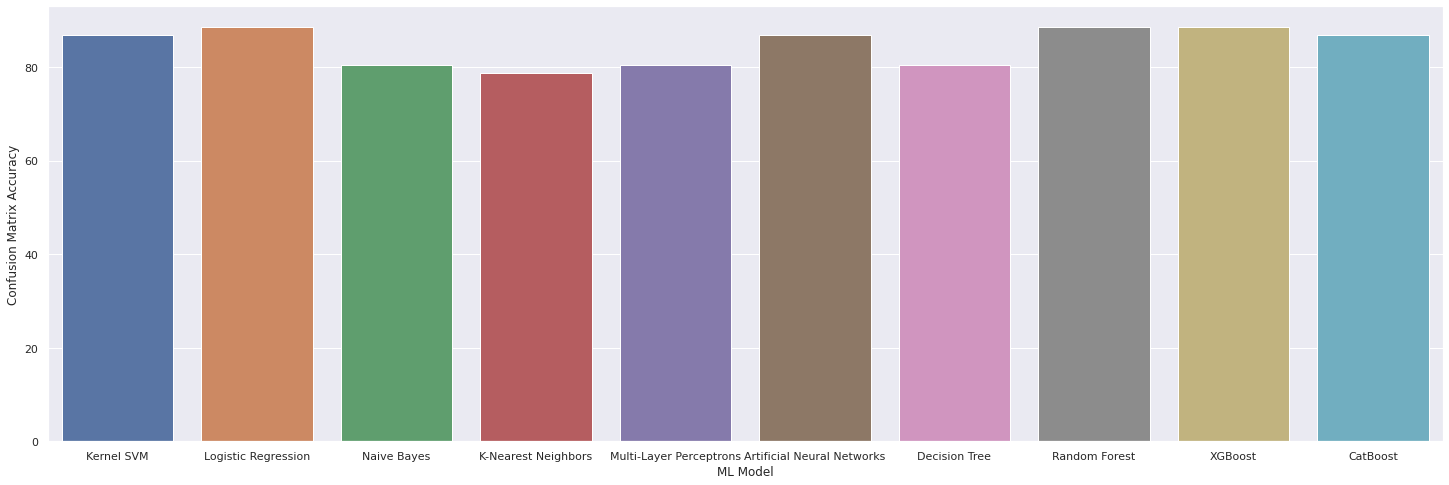

In [78]:
sns.set(rc={'figure.figsize':(25,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(model_results["ML Model"],model_results["Confusion Matrix Accuracy"])
plt.savefig("Accuracy Graph",format='svg', dpi=1200)

In [79]:
Models.clear()
Accuracy.clear()
KF.clear()